In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
import sklearn 
import math 
import scipy
import datetime 
import mlxtend
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [1]:
import pandas as pd 
import statsmodels.api as sm
import scipy.stats as stats
import numpy as np
import os
%matplotlib inline
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from math import sqrt
from scipy import stats

In [2]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier, KNeighborsRegressor
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [3]:
kc_dtypes = {'id': int, 'date' : str,  'price': float, 'bedrooms' : int, 'bathrooms' : float, 'sqft_living': int, 'sqft_lot': int, 'floors': float, 
             'waterfront': float, 'view' : float, 'condition': float, 'grade': int, 'sqft_above': int, 'yr_built': int,
             'yr_renovated': float, 'zipcode': float, 'lat': float, 'long': float, 'sqft_living15': int, 'sqft_lot15': int}


flatiron_data = pd.read_csv(r'~\Documents\Flatiron\data\data\Cleaned_Dataset.csv', parse_dates = ['date'], dtype=kc_dtypes)

In [4]:
parcel_dtypes = {'Major' : int, 'Minor' : int, 'PlatLot' : str, 'PlatBlock' : str, 'Range' : int, 'Township' : int, 'Section' : int,
                 'QuarterSection' : str, 'PropType' : str, 'DistrictName' : str , 'CurrentZoning':str, 'Unbuildable': int,  'WfntAccessRights' :str, 
                 'WfntProximityInfluence':str, 'PowerLines': str, 'OtherNuisances' : str ,  'DNRLease': str, 'AdjacentGolfFairway':str, 
                 'AdjacentGreenbelt':str, 'Easements' :str, 'OtherDesignation':str, 'DeedRestrictions':str, 'DevelopmentRightsPurch': str, 
                 'CoalMineHazard': str, 'CriticalDrainage':str, 'ErosionHazard':str, 'LandfillBuffer':str, 'HundredYrFloodPlain':str,
                 'SeismicHazard': str, 'LandslideHazard':str, 'SteepSlopeHazard':str, 'Stream':str, 'Wetland':str, 'SpeciesOfConcern':str,
                 'SensitiveAreaTract':str, 'WaterProblems':str, 'TranspConcurrency': str, 'OtherProblems':str, 'id': int }

In [5]:
kc_parcels = pd.read_csv(r'~\Documents\Flatiron\data\data\EXTR_Parcel.csv', encoding='ISO-8859-1', dtype=parcel_dtypes)
kc_resident = pd.read_csv(r'~\Documents\Flatiron\data\data\EXTR_ResBldg.csv', encoding='ISO-8859-1', low_memory=False)

In [6]:
#kc_condos1 = pd.read_csv(r'~\Documents\Flatiron\data\data\EXTR_CondoComplex.csv', encoding='ISO-8859-1', low_memory=False)
#kc_condos2 = pd.read_csv(r'~\Documents\Flatiron\data\data\EXTR_CondoUnit2.csv', encoding='ISO-8859-1', low_memory=False)

In [7]:
kc_appraisal = pd.read_csv(r'~\Documents\Flatiron\data\data\EXTR_RealPropApplHist_V.csv', encoding='ISO-8859-1', low_memory=False)
kc_breakdown = pd.read_csv(r'~\Documents\Flatiron\data\data\EXTR_UnitBreakdown.csv', encoding='ISO-8859-1', low_memory=False)

In [8]:
kc_resident = kc_resident.drop('ZipCode', axis=1).drop('DirectionSuffix', axis=1).drop('DirectionPrefix', axis=1)
kc_parcels = kc_parcels.drop('PlatName', axis=1).drop('PropName', axis=1).drop('SpecArea', axis =1).drop('SpecSubArea',  axis=1)

In [9]:
#kc_condos1['Minor'] = '0000'
#kc_condos2['Minor'] = '0000'

In [10]:
kc_web_df = [kc_parcels, kc_resident, kc_breakdown,  kc_appraisal]#, kc_condos1, kc_condos2]

In [35]:
for dataframe in kc_web_df:
    
    i = 0
    j = 0
    
    dataframe['Major'] = dataframe['Major'].astype(str)
    dataframe['Major'] = dataframe['Major'].str.strip()    
    dataframe['Minor'] = dataframe['Minor'].astype(str)
    dataframe['Minor'] = dataframe['Minor'].str.strip()
    
    for row in dataframe:
        while len(str(dataframe['Minor'][i])) + j < 4:
            dataframe['Major'][i]*10
            j += 1
            
            
    dataframe['id'] = dataframe['Major'] + dataframe['Minor']
    dataframe = dataframe.convert_dtypes(convert_integer=False)
    dataframe = dataframe.replace({'?': 0, '': 0, ' ': 0, 'N': 0, 'Y': 1})
    
    
    for column in dataframe:
        if dataframe[column].dtypes == int: 
            if dataframe[column].sum() == 0:
                dataframe.drop(column, axis=1)
    i += 1

In [36]:
kc_data.columns

NameError: name 'kc_data' is not defined

In [37]:
#kc_data.columns = kc_data.columns.droplevel(0)
#flatiron_data.columns = pd.MultiIndex.from_product([flatiron_data.columns, ['FI']])
#kc_appraisal.columns = pd.MultiIndex.from_product([kc_appraisal.columns, ['APP']])

kc_parcels = kc_parcels[['Area', 'SubArea', 
       'DistrictName', 'LevyCode', 'CurrentZoning', 
       'SqFtLot', 'WaterSystem', 'SewerSystem',
       'Access', 'Topography', 'StreetSurface', 'RestrictiveSzShape',
       'InadequateParking', 'PcntUnusable', 'Unbuildable', 'MtRainier',
       'Olympics', 'Cascades', 'Territorial', 'SeattleSkyline', 'PugetSound',
       'LakeWashington', 'LakeSammamish', 'SmallLakeRiverCreek', 'OtherView',
       'WfntLocation', 'WfntFootage', 'WfntBank', 'WfntPoorQuality',
       'WfntRestrictedAccess', 'WfntAccessRights', 'WfntProximityInfluence',
       'TidelandShoreland', 'LotDepthFactor', 'TrafficNoise', 'AirportNoise',
       'PowerLines', 'OtherNuisances', 'NbrBldgSites', 'Contamination',
       'DNRLease', 'AdjacentGreenbelt', 'HistoricSite',
       'CurrentUseDesignation', 'NativeGrowthProtEsmt', 'Easements',
       'OtherDesignation', 'DeedRestrictions', 'DevelopmentRightsPurch',
       'CoalMineHazard', 'CriticalDrainage', 'ErosionHazard', 'LandfillBuffer',
       'HundredYrFloodPlain','LandslideHazard',
       'SteepSlopeHazard', 'Stream', 'Wetland',
       'SensitiveAreaTract', 'WaterProblems', 
       'OtherProblems', 'id']].copy()

kc_resident = kc_resident[['BldgNbr', 'NbrLivingUnits', 'Address',
       'BuildingNumber', 'Fraction', 'StreetName', 'StreetType', 'Stories',
       'BldgGrade', 'BldgGradeVar', 'SqFt1stFloor', 'SqFtHalfFloor',
       'SqFt2ndFloor', 'SqFtUpperFloor', 'SqFtUnfinFull', 'SqFtUnfinHalf',
       'SqFtTotLiving', 'SqFtTotBasement', 'SqFtFinBasement',
       'FinBasementGrade', 'SqFtGarageBasement', 'SqFtGarageAttached',
       'DaylightBasement', 'SqFtOpenPorch', 'SqFtEnclosedPorch', 'SqFtDeck',
       'HeatSystem', 'HeatSource', 'BrickStone', 'ViewUtilization', 'Bedrooms',
       'BathHalfCount', 'Bath3qtrCount', 'BathFullCount', 'FpSingleStory',
       'FpMultiStory', 'FpFreestanding', 'FpAdditional', 'YrBuilt',
       'YrRenovated', 'PcntComplete', 'Obsolescence', 'PcntNetCondition',
       'Condition', 'AddnlCost', 'id']].copy()


kc_appraisal = kc_appraisal[['RollYr', 'RevalOrMaint', 'LandVal', 'ImpsVal',
       'NewDollars', 'id']].copy()

kc_breakdown = kc_breakdown[[ 'SqFt', 'NbrBedrooms', 'NbrBaths', 'id']].copy()


In [38]:
kc_data = kc_appraisal.merge(kc_parcels, how='outer', on='id')
kc_data['AppraisedVal'] = kc_data['LandVal'] + kc_data['LandVal'] + kc_data['LandVal']
kc_data = kc_data.loc[kc_data['RollYr'] == 2021].copy()
kc_data = kc_data.drop('RollYr', axis =1)

# Define the problem
outcome = 'AppraisedVal'
x_cols = ['RollYr', 'RevalOrMaint', 'LandVal', 'ImpsVal', 'NewDollars', 'id',
       'Area', 'SubArea', 'DistrictName', 'LevyCode', 'CurrentZoning',
       'SqFtLot', 'WaterSystem', 'SewerSystem', 'Access', 'Topography',
       'StreetSurface', 'RestrictiveSzShape', 'InadequateParking',
       'PcntUnusable', 'Unbuildable', 'MtRainier', 'Olympics', 'Cascades',
       'Territorial', 'SeattleSkyline', 'PugetSound', 'LakeWashington',
       'LakeSammamish', 'SmallLakeRiverCreek', 'OtherView', 'WfntLocation',
       'WfntFootage', 'WfntBank', 'WfntPoorQuality', 'WfntRestrictedAccess',
       'WfntAccessRights', 'WfntProximityInfluence', 'TidelandShoreland',
       'LotDepthFactor', 'TrafficNoise', 'AirportNoise', 'PowerLines',
       'OtherNuisances', 'NbrBldgSites', 'Contamination', 'DNRLease',
       'AdjacentGreenbelt', 'HistoricSite', 'CurrentUseDesignation',
       'NativeGrowthProtEsmt', 'Easements', 'OtherDesignation',
       'DeedRestrictions', 'DevelopmentRightsPurch', 'CoalMineHazard',
       'CriticalDrainage', 'ErosionHazard', 'LandfillBuffer',
       'HundredYrFloodPlain', 'LandslideHazard', 'SteepSlopeHazard', 'Stream',
       'Wetland', 'SensitiveAreaTract', 'WaterProblems', 'OtherProblems']

In [52]:
kc_data['Easements'].value_counts()

N    606300
Y     13896
Name: Easements, dtype: int64

In [39]:
corr = kc_data.corr().abs()
# Select upper triangle of correlation matrix
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.75)]
# Drop features 
kc_data.drop(to_drop, axis=1, inplace=True)

In [ ]:
#working on creating a list of columns with just numbers to filter by z score 

In [53]:
dict_ = {kc_data.columns, kc_data.dtypes}


TypeError: unhashable type: 'Index'

In [ ]:
kc_columns = []
zcolumns = []

for col in kc_columns:
    col_zscore = col + '_zscore'
    kc_data[col_zscore] = (kc_data[col] - kc_data[col].mean())/kc_data[col].std(ddof=0)
    kc_data = kc_data.loc[kc_data[col_zscore] < 3]
    kc_data = kc_data.loc[kc_data[col_zscore] > (-3)]
    kc_data.drop(col_zscore, axis = 1)
    zcolumns = col_zscore

In [ ]:
# Fitting the actual model
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=kc_data).fit()
model.summary()

In [ ]:
#kc_data = pd.concat(objs=[kc_appraisal, kc_parcels], join='outer', axis=1, keys='id')
#kc_data.columns = kc_data.columns.droplevel(0)
#kc_data = pd.concat(objs=[kc_resident, kc_data], join='outer', axis=1, keys='id')
#kc_data.columns = kc_data.columns.droplevel(0)
#kc_data = pd.concat(objs=[flatiron_data, kc_data], join='outer', axis=1, keys='id')
#kc_data.columns = kc_data.columns.droplevel(0)
#kc_data = pd.concat(objs=[kc_breakdown, kc_data], join='outer', axis=1, keys='id')
#kc_data.columns = kc_data.columns.droplevel(0)
#kc_data = kc_data.replace({'?': 0, '': 0, ' ': 0, 'N': 0, 'Y': 1})

In [28]:

kc_data = kc_data.loc[kc_data['RollYr'] == 2021].copy()

In [29]:
print(kc_data.columns)

Index(['RollYr', 'RevalOrMaint', 'LandVal', 'ImpsVal', 'NewDollars', 'id',
       'Area', 'SubArea', 'DistrictName', 'LevyCode', 'CurrentZoning',
       'SqFtLot', 'WaterSystem', 'SewerSystem', 'Access', 'Topography',
       'StreetSurface', 'RestrictiveSzShape', 'InadequateParking',
       'PcntUnusable', 'Unbuildable', 'MtRainier', 'Olympics', 'Cascades',
       'Territorial', 'SeattleSkyline', 'PugetSound', 'LakeWashington',
       'LakeSammamish', 'SmallLakeRiverCreek', 'OtherView', 'WfntLocation',
       'WfntFootage', 'WfntBank', 'WfntPoorQuality', 'WfntRestrictedAccess',
       'WfntAccessRights', 'WfntProximityInfluence', 'TidelandShoreland',
       'LotDepthFactor', 'TrafficNoise', 'AirportNoise', 'PowerLines',
       'OtherNuisances', 'NbrBldgSites', 'Contamination', 'DNRLease',
       'AdjacentGreenbelt', 'HistoricSite', 'CurrentUseDesignation',
       'NativeGrowthProtEsmt', 'Easements', 'OtherDesignation',
       'DeedRestrictions', 'DevelopmentRightsPurch', 'CoalMineHazar

In [30]:
print(list(kc_data.columns))


['RollYr', 'RevalOrMaint', 'LandVal', 'ImpsVal', 'NewDollars', 'id', 'Area', 'SubArea', 'DistrictName', 'LevyCode', 'CurrentZoning', 'SqFtLot', 'WaterSystem', 'SewerSystem', 'Access', 'Topography', 'StreetSurface', 'RestrictiveSzShape', 'InadequateParking', 'PcntUnusable', 'Unbuildable', 'MtRainier', 'Olympics', 'Cascades', 'Territorial', 'SeattleSkyline', 'PugetSound', 'LakeWashington', 'LakeSammamish', 'SmallLakeRiverCreek', 'OtherView', 'WfntLocation', 'WfntFootage', 'WfntBank', 'WfntPoorQuality', 'WfntRestrictedAccess', 'WfntAccessRights', 'WfntProximityInfluence', 'TidelandShoreland', 'LotDepthFactor', 'TrafficNoise', 'AirportNoise', 'PowerLines', 'OtherNuisances', 'NbrBldgSites', 'Contamination', 'DNRLease', 'AdjacentGreenbelt', 'HistoricSite', 'CurrentUseDesignation', 'NativeGrowthProtEsmt', 'Easements', 'OtherDesignation', 'DeedRestrictions', 'DevelopmentRightsPurch', 'CoalMineHazard', 'CriticalDrainage', 'ErosionHazard', 'LandfillBuffer', 'HundredYrFloodPlain', 'LandslideHazar

In [38]:
kc_data.NewDollars.value_counts()

0            706426
126122733       392
20000           290
50000           229
109000          204
              ...  
1875000           1
1046000           1
776400            1
12753500          1
53489400          1
Name: NewDollars, Length: 2237, dtype: Int64

In [21]:
kc_data['Wetland']

14             N
48             N
72             N
97             N
123            N
            ... 
16424924    <NA>
16424925       N
16424926       N
16424927       N
16424928       N
Name: Wetland, Length: 727934, dtype: string

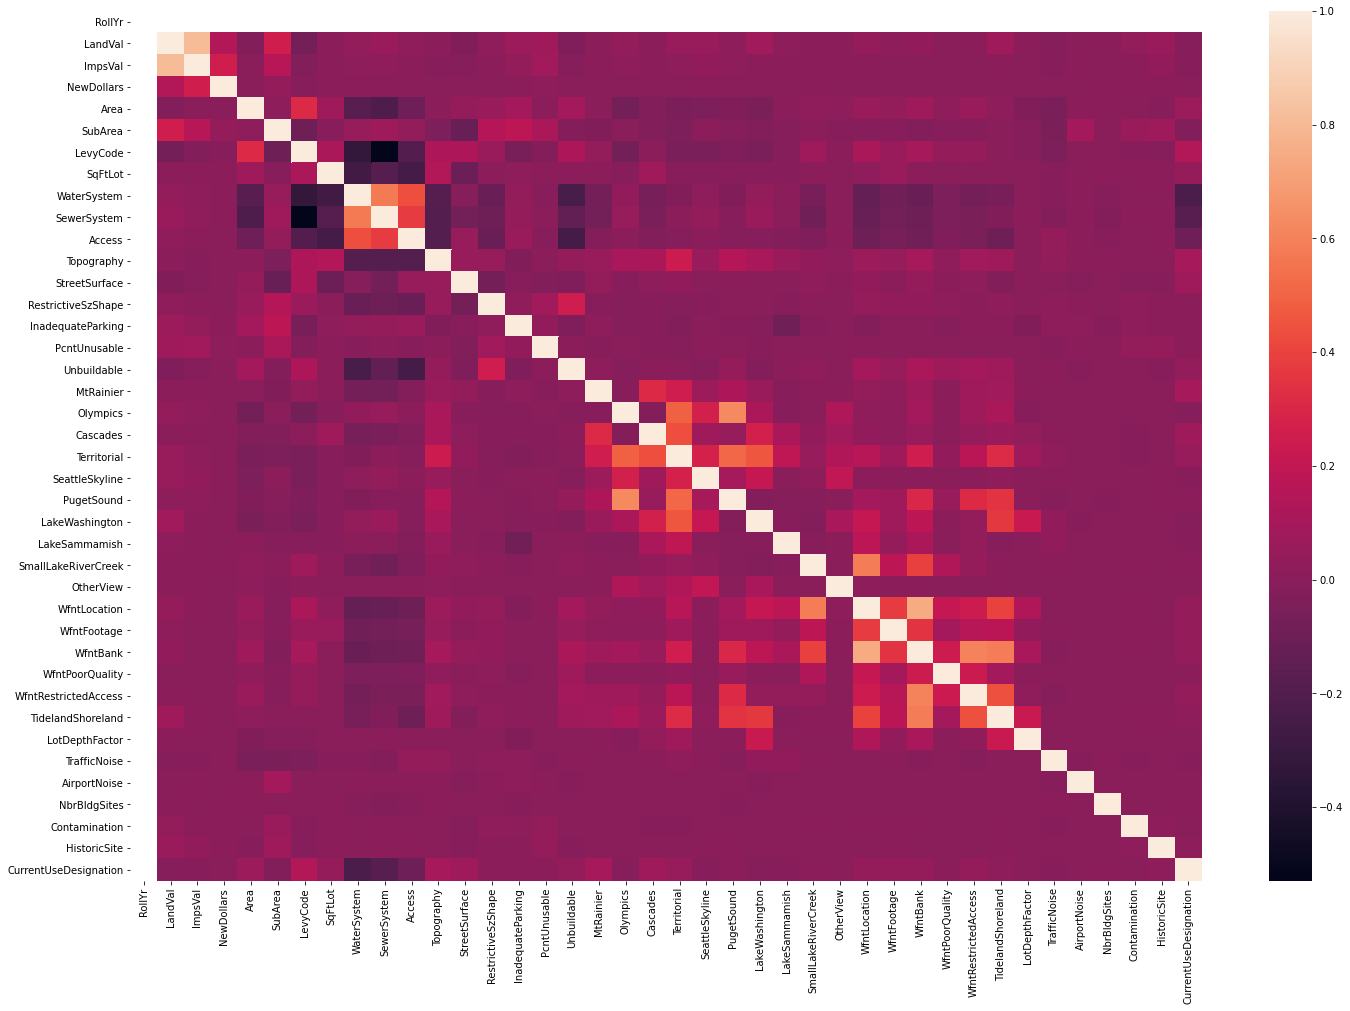

In [22]:
fig_dims = (24, 16)
fig, ax = plt.subplots(figsize = fig_dims)
sns.heatmap(kc_data.corr(), ax=ax)
plt.show()